# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=20)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


18

In [3]:
cities

['punta arenas',
 'cape town',
 'tiksi',
 'puerto ayora',
 'dvinskoy',
 'torbay',
 'ushuaia',
 'rikitea',
 'adrar',
 'roald',
 'provideniya',
 'new norfolk',
 'cabot',
 'dolbeau',
 'port alfred',
 'vaini',
 'tezu',
 'totness']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
import pprint
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []
# Loop through cities making the API call
i = 1
for city in cities:
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    #print(query_url)
    #pprint.pprint(response)
    #break
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City name not available.")

Processing record 1|punta arenas
Processing record 2|cape town
Processing record 3|tiksi
Processing record 4|puerto ayora
Processing record 5|dvinskoy
Processing record 6|torbay
Processing record 7|ushuaia
Processing record 8|rikitea
Processing record 9|adrar
Processing record 10|roald
Processing record 11|provideniya
Processing record 12|new norfolk
Processing record 13|cabot
City name not available.
Processing record 14|port alfred
Processing record 15|vaini
Processing record 16|tezu
Processing record 17|totness


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame({"City": city_name,
                        "Cloudiness": cloudiness,
                        "Country": country,
                        "Date": date,
                        "Humidity":humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": max_temp,
                        "Wind Speed": wind_speed
                                         })
city_df.head(2)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,20,CL,1638915168,50,-53.1500,-70.9167,50.11,27.63
1,Cape Town,100,ZA,1638915257,81,-33.9258,18.4232,64.35,4.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000
mean,72.529412,1.638915e+09,68.764706,7.908353,-26.794918,49.864118,12.420588
std,30.575966,7.417537e+01,22.353773,44.477894,96.738914,28.050821,8.430678
min,10.000000,1.638915e+09,15.000000,-54.800000,-175.200000,-21.100000,1.010000
25%,75.000000,1.638915e+09,53.000000,-33.590600,-90.351800,43.680000,6.710000
50%,81.000000,1.638915e+09,77.000000,5.883300,-52.731400,60.460000,9.220000
75%,96.000000,1.638915e+09,84.000000,47.666600,26.891000,67.410000,14.970000
max,100.000000,1.638915e+09,94.000000,71.687200,147.058700,80.560000,29.930000


In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity_cities = city_df.loc[city_df["Humidity"] > 100]
humidity_cities

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [ ]:
indix_list = city_df.loc[city_df["Humidity"] > 100].index

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_df.drop(index_list, inplace=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

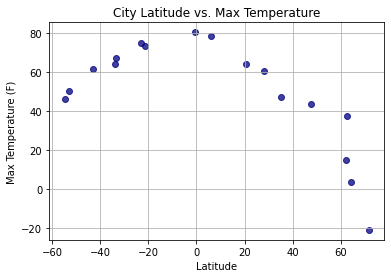

In [9]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature")
plt.savefig("output_data/Latitude vs. Max Temp plot.png")
plt.show()

## Latitude vs. Humidity Plot

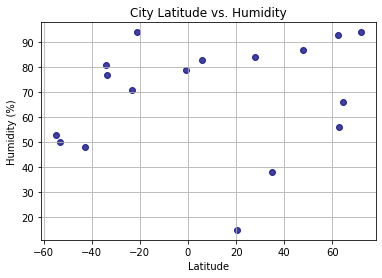

In [25]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity")
plt.savefig("output_data/Latitude vs. Humidity plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

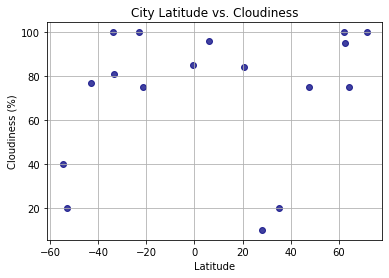

In [26]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness")
plt.savefig("output_data/Latitude vs. Cloudiness plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

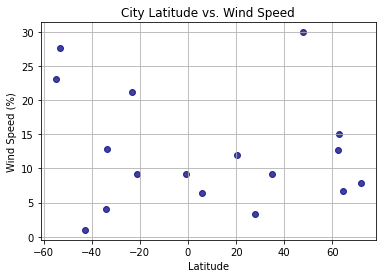

In [27]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.title(f"City Latitude vs. Wind Speed")
plt.savefig("output_data/Latitude vs. Wind Speed plot.png")
plt.show()

## Linear Regression

In [10]:
# Linear regression function
def linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # y = mx + b
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    return [line_eq, rvalue]

# Line annotation function
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [11]:
north_df = city_df.loc[city_df["Lat"] >= 0]
south_df = city_df.loc[city_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.8334754860339795


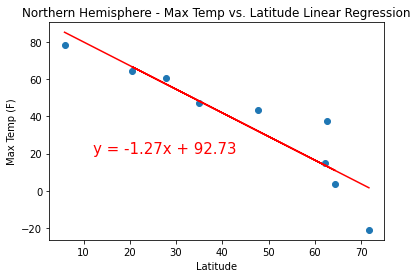

In [24]:
equation = linear_regression(north_df["Lat"], north_df["Max Temp"])
annotate(equation[0], 12, 20)

plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Show plot
plt.show()

In [ ]:
x_values = lats = np.random.uniform(lat_range[0], lat_range[1], size=20).astype('float')
y_values = lngs = np.random.uniform(lng_range[0], lng_range[1], size=20).astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Max Temp')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.9149863149737903


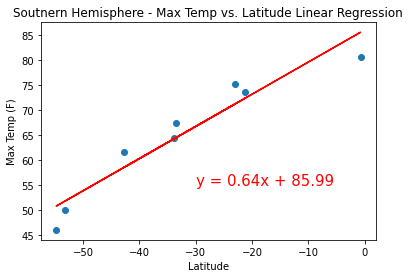

In [22]:
equation = linear_regression(south_df["Lat"], south_df["Max Temp"])
annotate(equation[0], -30, 55)

plt.title(f"Soutnern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.5397984580007149


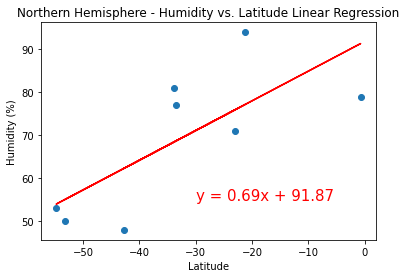

In [28]:
equation = linear_regression(south_df["Lat"], south_df["Humidity"])
annotate(equation[0], -30, 55)

plt.title(f"Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.5397984580007149


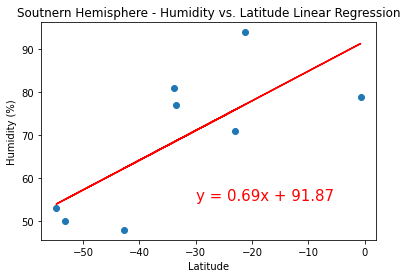

In [29]:
equation = linear_regression(south_df["Lat"], south_df["Humidity"])
annotate(equation[0], -30, 55)

plt.title(f"Soutnern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
equation = linear_regression(south_df["Lat"], south_df["Cloudiness"])
annotate(equation[0], -30, 55)

plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
equation = linear_regression(south_df["Lat"], south_df["Max Temp"])
annotate(equation[0], -30, 55)

plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
equation = linear_regression(south_df["Lat"], south_df["Wind Speed"])
annotate(equation[0], -30, 55)

plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
equation = linear_regression(south_df["Lat"], south_df["Wind Speed"])
annotate(equation[0], -30, 55)

plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")